In [1]:
import pandas as pd
import numpy as np
import string
import sys
import re

#text processing, NLP modules
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.cluster import KMeansClusterer
 
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.cluster import DBSCAN, MiniBatchKMeans, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import gensim.downloader
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#!pip install python-Levenshtein

In [3]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['moderna', 'covaxin', 'covid19', 'pfizerbiontech', 'vaccine', 'sputnikv', 'oxfordastrazeneca', 'covidvaccine', 'pfizer', 'sinovac', 'sinopharm', 'covid19vaccine', 'astrazeneca', 'covid', 'coronavirus', 'vaccines', 'china', 'russia', 'covishield', 'vaccination', 'vaccinated', 'pfizervaccine', 'eu', 'india', 'covid_19', 'bharatbiotech', 'covidvaccination', 'covid19vaccination', 'coronavaccine', 'mrna', 'johnsonandjohnson', 'getvaccinated', 'biontech', 'narendramodi', 'hongkong', 'pakistan', 'covidvacccine', 'pmmodi', 'modernavaccine', 'ocgn', 'iran', 'nhs', 'coronavirusvaccine', 'ocugen', 'breaking', 'covidvaccines', 'aiims', 'russian', 'pfizercovidvaccine', 'vaccineswork', 'news', 'putin', 'uk', 'who', 'us', 'canada', 'italy', 'covidー19', 'covid19vaccines', 'israel', 'corona', 'hungary', 'zimbabwe', 'pandemic', 'covax', 'oxfordvaccine', 'usa', 'health', 'modi', 'vaccine', 'first', 'covid', 'dose', 'today', '19', 'vaccines', 'amp', 'shot', 'doses']
#stopwords.extend(newStopWords)

In [24]:
df_tweety = pd.read_csv('Data/tweety_test.csv')

In [31]:
df_tweety

,index,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,text,hashtags,source,retweets,favorites,is_retweet,day,user_infl,sentiment,label
0,8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,...,covid vaccine getting,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,2020-12-12,36.0,NaN,NaN
1,32,1337744008500703232,Contagion,"Cranbury, NJ",Providing timely news to improve the diagnosis...,2016-01-29 15:54:55,5998,815,5867,False,...,authorized united states last night,"['ICYMI', 'FDA', 'PfizerBioNTech', 'COVID19', ...",TweetDeck,0,1,False,2020-12-12,45.0,NaN,NaN
2,35,1337739607857917954,Shahjhan Malik | #WearAMask,"Nottinghamshire, England",Solicitor.Dual Qualified.Single Parent Of 2 Am...,2017-06-22 06:22:55,41708,2868,47862,False,...,immigrant muslim couple find covid vaccine,"['CovidVaccine', 'PfizerBioNTech', 'Pfizervacc...",Twitter for iPhone,2,37,False,2020-12-12,119.0,NaN,NaN
3,37,1337734069816348673,Farooq Anees,"دبي, الامارات العربية المتحدة",Somethings are better not be disclosed.... \o/,2010-12-23 11:51:01,293,319,165,False,...,ladies gentlemen experts every household,"['CovidVaccine', 'Pakistan', 'PfizerBioNTech',...",Twitter for Android,0,0,False,2020-12-12,11.0,NaN,NaN
4,38,1337733927885303808,KHuntson,USA🇺🇸,"RN, health educator, writer, researcher, wife,...",2014-01-31 01:25:24,2035,1672,6734,False,...,fact sheet healthcare providers administering ...,"['PfizerBioNTech', 'CovidVaccine']",Twitter Web App,0,0,False,2020-12-12,36.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,8824,1360970003332300800,Hrushikesha Mohanty,ରହୁରହୁ ହାଇଦରବାଦିଆ,ପ୍ରକୃତ ବାଲେଶ୍ୱର ଜିଲା ବଂଗାଳପୁର,2011-06-12 19:52:56,1591,77,7400,False,...,seen covaxin trending twitter let give scienti...,"['JayVigyan', 'Covaxin']",Twitter Web App,0,8,False,2021-02-14,33.0,NaN,NaN
997,8828,1360921103112282120,Revati,Kerala,Painting my world... WIP,2009-09-23 13:59:24,4200,656,27914,False,...,got clarifications,['Covaxin'],Twitter for Android,2,10,False,2021-02-14,61.0,NaN,NaN
998,8834,1361241650824171521,WAM English,UAE,The official Twitter feed for Emirates News Ag...,2014-09-04 10:22:21,42764,18,11,True,...,approves russia vaccine use,"['Kazakhstan', 'SputnikV', 'WamNews']",Twitter Web App,0,1,False,2021-02-15,98.0,NaN,NaN
999,8850,1361185592327872517,Sikreto,NaN,NaN,2020-12-15 00:05:33,1,2,0,False,...,muslims world spy criminals worldwide,"['SputnikV', 'ShameonyouChina', 'ChinaSetupFir...",Twitter for Android,0,0,False,2021-02-15,1.0,NaN,NaN


In [25]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [28]:
def clean_tweet(x):
    
    x = str(x)
    x = x.lower()

    #remove twitter handlers
    x = re.sub('@[^\s]+','',x)
    #remove hashtags
    x = re.sub('#[^\s]+','',x)
    #remove URLs
    x = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x)
    #remove punctuation
    x = x.replace('[^\w\s]','')
    #remove single characters
    x = re.sub(r'\s+[a-zA-Z0-9]\s+', '', x)
    #substitute multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    #remove linebreaks
    x = re.sub('\n', '', x)
    #remove special characters
    x = ' '.join(re.findall(r'\w+', x))
    #substitute multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    #stemming
    #x = ' '.join([stemmer.stem(word) for word in x.split() ])
    #lemmatizing
    #x = ' '.join([lemmatizer.lemmatize(word) for word in x.split() ])
    #removing stop words
    x = ' '.join([word for word in x.split() if word not in stopwords])
    x = x.split()

    return x

In [29]:
sentences = [row for row in df_tweety.text]

In [30]:
import random
text_data = []
for tweet in df_tweety.text:
    tokens = clean_tweet(tweet)
    if random.random() > .99:
        print(tokens)
        text_data.append(tokens)

['due', 'get', 'vaccine', 'tuesday', 'super', 'thrilled']
['buy', 'extra', 'million', 'doses']
['_', 'affected', 'covid']
['first', 'vaccine', 'dose']
['getting', 'vaccine', 'today']
['mixed', 'matched']
['indeed', 'new', 'vaccine', 'candidates', 'interested', 'news', 'topic']
['grandma', 'got', 'first', 'dose']
['news', 'related', 'selling', 'indian', 'covid', 'vaccine', 'us']
['prof', 'bharat', 'biotech', 'suppose', 'publish', 'resulta', 'phasetrial']
['let', 'get', 'fda', 'approval', 'ocgn']
['pakistan', 'registered', 'sputnikcoronavirus', 'vaccine', 'registered']
['want']
['pfe', 'mrna', 'biden', 'purchases', 'another', '200m', 'doses']


In [21]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [22]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [23]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.071*"vaccine" + 0.038*"palsy" + 0.038*"bell" + 0.038*"face"')
(1, '0.078*"2nd" + 0.043*"forhours" + 0.043*"symptoms" + 0.043*"said"')
(2, '0.041*"richiami" + 0.041*"che" + 0.041*"noi" + 0.041*"siamo"')
(3, '0.079*"first" + 0.079*"dose" + 0.079*"vaccinated" + 0.079*"got"')
(4, '0.091*"thank" + 0.091*"vaccinated" + 0.015*"first" + 0.015*"dose"')


In [51]:
# Downloading the GLoVe Pretrained Vectorizer
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

In [52]:
# Creating a function that calculates the embeddings for the whole sentence by summing up the embedding of 
# each word und dividing it by the sum of words in the sentence
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    values = sent.split()
    for w in values:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    
    return np.asarray(sent_vec) / numw
  
# Saving the embeddings in a list X
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, glove_vectors))   

In [41]:
#X[62]

X_new = [arr for arr in X if arr!=[]]

<ipython-input-41-66b1d707c5dd>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  X_new = [arr for arr in X if arr!=[]]
<ipython-input-41-66b1d707c5dd>:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  X_new = [arr for arr in X if arr!=[]]


In [14]:
#arr = np.stack(arr, axis=0)
#arr.shape
#arr = np.asarray(X)
#arr.ndim
#arr = np.reshape(arr, (-1, 1))

In [15]:
#arr

In [53]:
# Using PCA for Dimensionality Reduction
# And the StandardScaler to scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
pca_ = PCA(0.99, random_state=0)
X_pca=pca_.fit_transform(X_scaled)

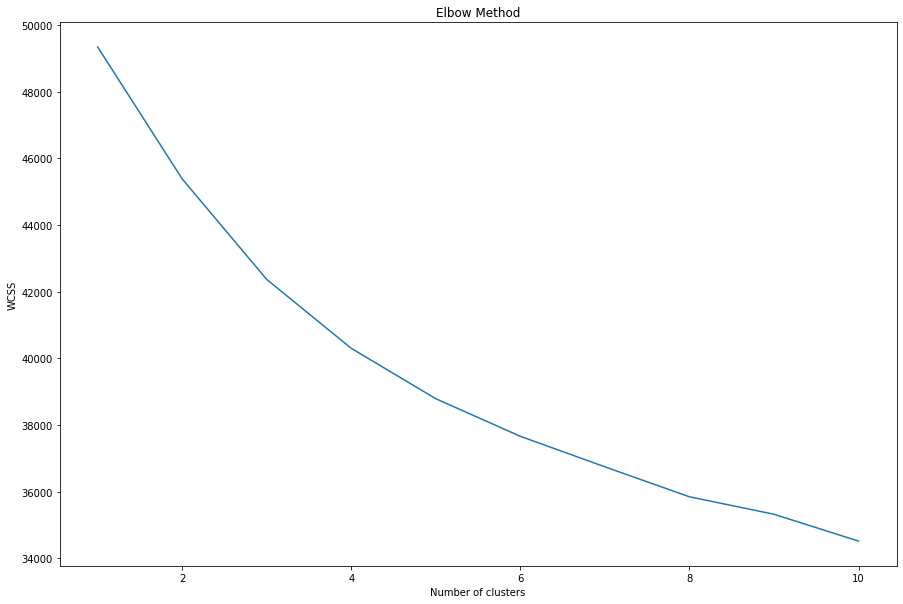

In [54]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=150, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X_pca, assign_clusters=True)

/Users/christophmichel/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


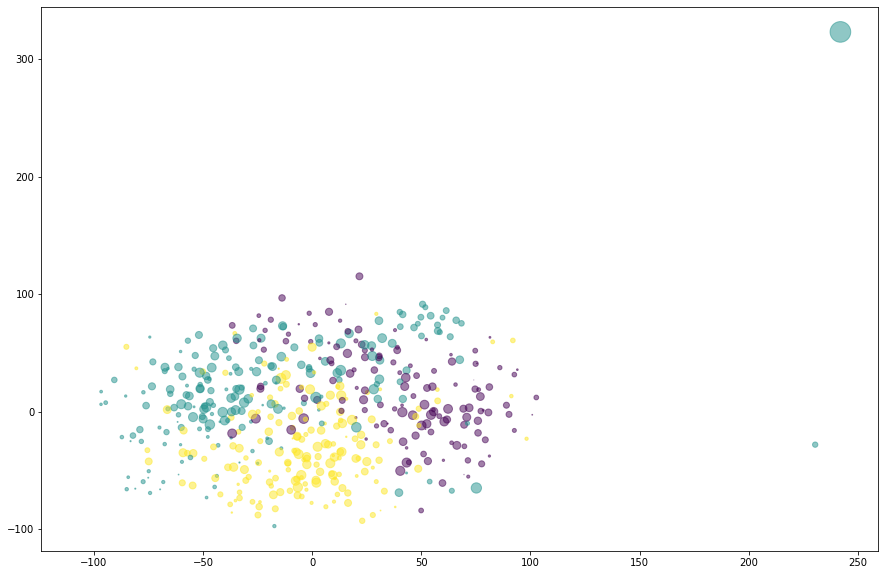

In [56]:
# Using t-SNE to prepare the data for plotting
model1 = TSNE(n_components=3, random_state=0)

Y = model1.fit_transform(X_pca)

plt.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=assigned_clusters, alpha=.5)#s=190, alpha=.5);
#for j in range(len(sentences)):    
    #plt.annotate(data.target[j], xy=(Y[j][0], Y[j][1]), xytext=(0,0), textcoords='offset points') 

In [58]:
#kmeans.cluster_centers_

In [27]:
# Importing the word2vec model
model = Word2Vec(sentences, min_count=1)

In [28]:
# Importing the word2vec model
model = Word2Vec(sentences, min_count=1)



# Creating a function that calculates the embeddings for the whole sentence by sum up the embedding of 
# each word und divide it by the sum of words in the sentence
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw


# Saving the embeddings into a list X  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))

In [59]:
# Using PCA for Dimensionality Reduction
# And the StandardScaler to scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
pca_ = PCA(0.99, random_state=0)
X_pca=pca_.fit_transform(X_scaled)

In [60]:
  
# Creating the KMeans Clustering model with the implementation of the nltk library
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X_pca, assign_clusters=True)

/Users/christophmichel/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


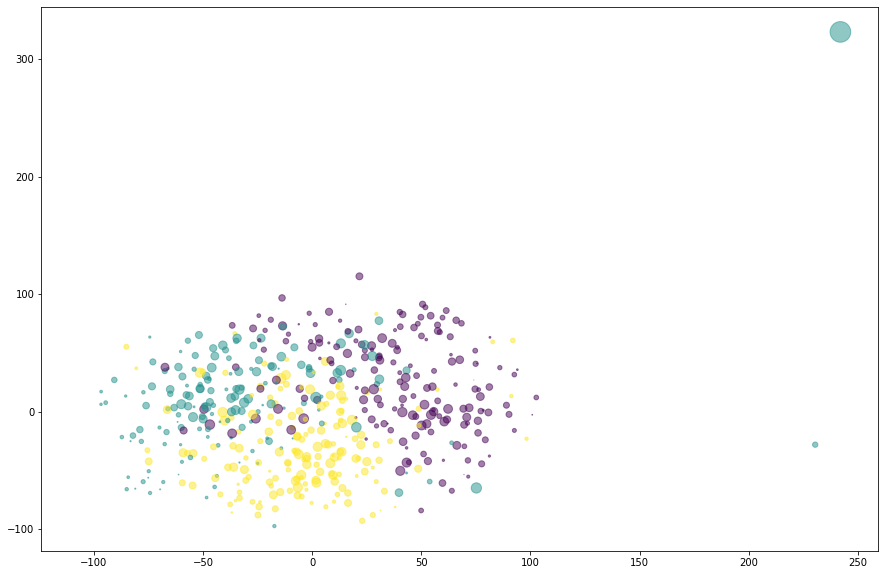

In [61]:
# Using t-SNE to prepare the data for plotting
model1 = TSNE(n_components=3, random_state=0)

Y = model1.fit_transform(X_pca)

plt.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=assigned_clusters, alpha=.5)
#for j in range(len(sentences)):    
    #plt.annotate(data.target[j], xy=(Y[j][0], Y[j][1]), xytext=(0,0), textcoords='offset points') 

In [62]:
kmeans.cluster_centers_

array([[ 3.52315450e+00, -2.19070816e-01, -1.75431500e-01,
        -1.01254204e+00, -1.15141581e-01, -2.86303334e-01,
         2.70514278e-01,  9.46470464e-02,  1.38806746e-01,
        -4.94432423e-02, -1.47659405e-01, -6.96308710e-03,
        -3.04637416e-01,  1.85741909e-01,  5.36473781e-02,
        -1.88501628e-02, -7.61136843e-02, -5.19838666e-02,
        -5.87228682e-02, -1.97348055e-02,  3.71979818e-02,
         1.29300063e-03, -2.63253291e-02, -4.47548141e-02,
        -4.91900077e-03, -2.33839714e-02, -3.94349409e-02,
        -6.50471999e-03, -6.83482847e-02,  1.09338931e-02,
        -5.01283128e-03,  9.90434434e-03, -2.82440444e-02,
        -2.21977570e-02, -4.97325587e-02,  2.37029757e-02,
        -3.20225607e-03, -6.27145248e-02, -3.14361691e-02,
        -6.28040142e-02, -4.17675689e-02],
       [-3.95826262e+00,  1.06731589e+01, -1.85535978e+00,
        -3.95317295e+00,  3.73109640e+00, -7.73489286e-04,
        -3.83243688e-01,  8.22362503e-02,  7.91876692e-01,
        -1.19

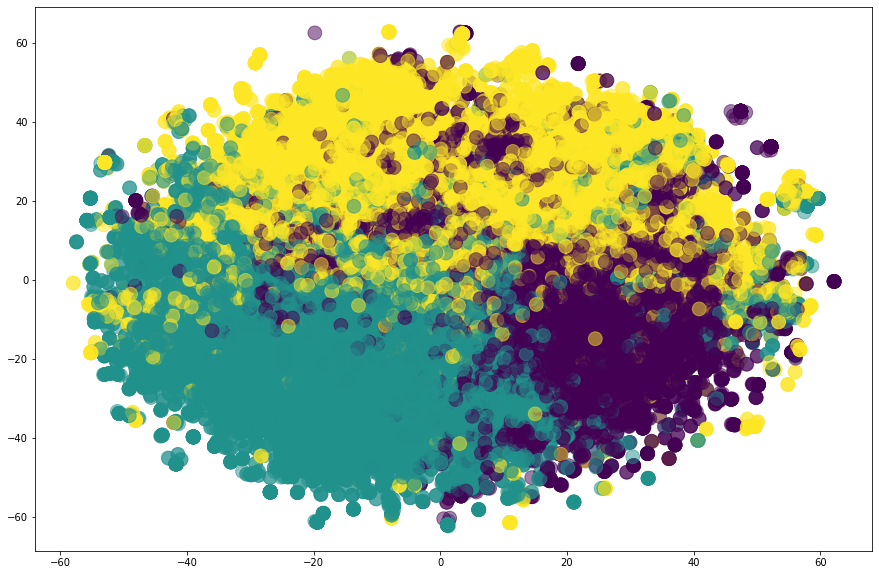

In [861]:
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X_pca, assign_clusters=True)

# Using t-SNE to prepare the data for plotting
model1 = TSNE(n_components=2, random_state=0)

Y = model1.fit_transform(X_pca)

plt.scatter(Y[:, 0], Y[:, 1], c=batch_kmeans.labels_, s=190, alpha=.5)